#### face mask detection

Getting and preparing the data

Since we are building an object detector from scratch, we cannot use a pre-built model or transfer learning neither. This means that we need to train everything from scratch, starting from the model weights random initialization.

In [1]:
import tensorflow as tf

In [28]:
import os, random

In [3]:
os.getcwd()

'd:\\a27_YEARS_OLD\\deep_learning\\CV'

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("D:/a27_YEARS_OLD/deep_learning/CV/labeled-mask-dataset-yolo-darknet")

# print("Path to dataset files:", path)

In [ ]:
# D:/a27_YEARS_OLD/deep_learning/CV/

In [39]:
with open('labeled-mask-dataset-yolo-darknet/versions/1/obj/0.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()


In [20]:
discarded = 0
masked_instance = 0

In [21]:
files = []

In [ ]:
full_data_path = 'labeled-mask-dataset-yolo-darknet/versions/1/' # obj/

In [ ]:
for r, d, f in os.walk(full_data_path): # walk through data path to find content
    # print(r)
    # print(d)
    # print(f)
    for file in f:
        # print(file)
        if file.endswith(".txt"):
            # first, let's check if there is only one object
            with open( full_data_path + 'obj/' + file, 'r') as fp: 
                lines = fp.readlines()
                if len(lines) > 1:
                    discarded += 1
                    continue
            # print(file)

            strip = file[0:len(file) - len(".txt")]  
            # print(strip)
            # secondly, check if the paired image actually exist
            image_path = full_data_path + "obj/" + strip + '.jpg'
            text_path = full_data_path + "obj/" + strip + '.txt'
            # print(image_path)

            if os.path.isfile(text_path):
                # checking the class. '0' means masked, '1' for unmasked
                # print('x')  
                if lines[0][0] == '0': # 0 0.5752380952380952 0.4142857142857143 0.21714285714285714 0.3485714285714286
                    masked_instance += 1
                files.append(strip)

In [12]:
text_path = full_data_path + "obj/" + strip + '.txt'

In [13]:
text_path

'labeled-mask-dataset-yolo-darknet/versions/1/obj/with_maskb (9).txt'

In [25]:

size = len(files)   
print(str(discarded) + " file(s) discarded")
print(str(size) + " valid case(s)")
print(str(masked_instance) + " are masked cases")

218 file(s) discarded
1292 valid case(s)
832 are masked cases


In [26]:
files

['0-with-mask',
 '0',
 '1-with-mask',
 '10-with-mask',
 '100-with-mask',
 '101-with-mask',
 '103-with-mask',
 '104-with-mask',
 '105-with-mask',
 '106-with-mask',
 '107-with-mask',
 '108-with-mask',
 '109-with-mask',
 '11-with-mask',
 '110-with-mask',
 '111-with-mask',
 '112-with-mask',
 '113-with-mask',
 '114-with-mask',
 '115-with-mask',
 '116-with-mask',
 '117-with-mask',
 '118-with-mask',
 '119-with-mask',
 '12-with-mask',
 '120-with-mask',
 '121-with-mask',
 '122-with-mask',
 '123-with-mask',
 '124-with-mask',
 '125-with-mask',
 '126-with-mask',
 '127-with-mask',
 '128-with-mask',
 '129-with-mask',
 '13-with-mask',
 '131-with-mask',
 '132-with-mask',
 '132',
 '133-with-mask',
 '134-with-mask',
 '134',
 '135-with-mask',
 '136-with-mask',
 '137-with-mask',
 '137',
 '138-with-mask',
 '138',
 '139-with-mask',
 '14-with-mask',
 '140-with-mask',
 '141-with-mask',
 '144-with-mask',
 '146-with-mask',
 '147-with-mask',
 '148-with-mask',
 '148',
 '149',
 '150-with-mask',
 '151-with-mask',
 

In [29]:
random.shuffle(files)

In [31]:
files[:5]

['257-with-mask',
 'masked (6)',
 '399-with-mask',
 'unmasked (1576)',
 'masked (1332)']

In [33]:
size = len(files)

In [34]:
size

1292

In [50]:
split_percentage = [50,30,20]


In [42]:
split_training = int(split_percentage[0] * size / 100)
# split_validation = split_training + int(split_percentage[1] * size / 100)

In [54]:
split_validation = int(split_percentage[1] * size / 100)

In [51]:
split_test = int(split_percentage[2] * size / 100)

In [44]:
split_training

646

In [55]:
split_validation


387

In [52]:
split_test

258

In [ ]:
files[0:split_training]

['257-with-mask',
 'masked (6)',
 '399-with-mask',
 'unmasked (1576)',
 'masked (1332)']

In [56]:
files[split_training:(split_training+split_validation)][:5]

['418-with-mask',
 'masked (1370)',
 'unmasked (1649)',
 '270-with-mask',
 'unmasked (1372)']

In [58]:
files[split_training+split_validation:][:5]

['3-with-mask',
 '217-with-mask',
 'unmasked (1644)',
 'unmasked (1584)',
 'masked (1410)']

In [59]:
import os, random

def list_files(full_data_path ,  split_percentage ):
    
    files = []

    discarded = 0
    masked_instance = 0

    for r, d, f in os.walk(full_data_path):
        # print(r)
        # print(d)
        # print(f)
        for file in f:
            # print(file)
            if file.endswith(".txt"):
                # first, let's check if there is only one object
                with open( full_data_path + 'obj/' + file, 'r') as fp: 
                    lines = fp.readlines()
                    if len(lines) > 1:
                        discarded += 1
                        continue
                # print(file)

                strip = file[0:len(file) - len(".txt")]  
                # print(strip)
                # secondly, check if the paired image actually exist
                # image_path = full_data_path + "obj/" + strip + '.jpg'
                text_path = full_data_path + "obj/" + strip + '.txt'
                # print(image_path)

                if os.path.isfile(text_path):
                    # checking the class. '0' means masked, '1' for unmasked
                    # print('x')
                    if lines[0][0] == '0':
                        masked_instance += 1
                    files.append(strip)


    size = len(files)   
    # print(str(discarded) + " file(s) discarded")
    # print(str(size) + " valid case(s)")
    # print(str(masked_instance) + " are masked cases")

    random.shuffle(files)

    split_training = int(split_percentage[0] * size / 100)
    split_validation = int(split_percentage[1] * size / 100)
    split_test = int(split_percentage[2] * size / 100)

    return files[0:split_training], files[split_training:(split_training+split_validation)], files[split_training+split_validation:]
    


In [60]:
training_files, validation_files, test_files = list_files(full_data_path= full_data_path  , split_percentage = [50,30,20])

print(str(len(training_files)) + " training files")
print(str(len(validation_files)) + " validation files")
print(str(len(test_files)) + " test files")

646 training files
387 validation files
259 test files


In [64]:
file_path = 'labeled-mask-dataset-yolo-darknet/versions/1/obj/'

In [65]:
from pathlib import Path
import shutil


In [ ]:
sub_dir1_list = ['train', 'validation', 'test']
sub_dir2_list = ['mask', 'without_mask']

In [67]:
root_dir = Path('facemasks')
# Create directories
root_dir.mkdir(parents=True, exist_ok=True)

In [69]:
for sub_dir1 in sub_dir1_list:
    sub_dir = root_dir / sub_dir1
    sub_dir.mkdir(parents=True, exist_ok=True)
    for sub_dir2 in sub_dir2_list:
        sub_dir2 = sub_dir / sub_dir2
        sub_dir2.mkdir(parents=True, exist_ok=True)

In [ ]:
# Define paths
file_path = Path(file_path)

In [ ]:
# D:\a27_YEARS_OLD\deep_learning\CV\facemasks\train\image

In [ ]:
import re

In [ ]:
mask_pattern = r"^.*with-mask|masked.*$"

In [ ]:
unmasked_pattern = r"^.*unmasked.*$"

In [ ]:

for file in files[0:split_training]:
    if re.search(mask_pattern, file):
        img_file = file_path + file + ".jpg"
        shutil.copy(str(img_file), 'facemasks/train/mask')
    

In [ ]:
for file in files[0:split_training]:
    if re.search(unmasked_pattern, file):
        img_file = file_path + file + ".jpg"
        shutil.copy(str(img_file), 'facemasks/train/withoout_mask')

In [ ]:
for file in files[split_training:(split_training+split_validation)]:
    if re.search(mask_pattern, file):
        img_file = file_path + file + ".jpg"
        shutil.copy(str(img_file), 'facemasks/validation/mask')
        

In [ ]:
for file in files[split_training:(split_training+split_validation)]:
    if re.search(unmasked_pattern, file):
        img_file = file_path + file + ".jpg"
        shutil.copy(str(img_file), 'facemasks/validation/without_mask')

In [ ]:
for file in files[split_training+split_validation:]:
    if re.search(mask_pattern, file):
        img_file = file_path + file + ".jpg"
        shutil.copy(str(img_file), 'facemasks/test/mask')

In [ ]:
for file in files[split_training+split_validation:]:
    if re.search(unmasked_pattern, file):
        img_file = file_path + file + ".jpg"
        shutil.copy(str(img_file), 'facemasks/test/without_mask')

In [ ]:
# Copy file
try:
    shutil.copy(str(file_path), str(sub_dir))
    print(f"File copied to '{sub_dir}'")
except FileNotFoundError:
    print("File not found")
except Exception as e:
    print(f"Error: {e}")

## using classification

Detect COVID-19 face masks in images
Detect face masks in real-time video streams

In [72]:

# The number of images with facemask labelled ‘yes’ class: 
# The number of images with facemask labelled ‘no’ class: 
# We see that, after data augmentation, we have a total of 2751 images with 
# 1380 images in the ‘yes’ class and ‘1371’ images in the ‘no’ class.

# Found 2200 images belonging to 2 classes. 
# Found 551 images belonging to 2 classes.

# labels_dict={0:’without_mask’,1:’with_mask’} 
# color_dict={0:(0,0,255),1:(0,255,0)}

# ace_clsfr=cv2.CascadeClassifier(‘haarcascade_frontalface_default.xml’)

In [ ]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(100, (3, 3), activation='relu',
						input_shape=(150, 150, 3)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(100, (3, 3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(50, activation='relu'),
	tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
datagenerator_kwargs = dict(
            rescale = 1./255,
            # validation_split=0.20
        )

In [ ]:
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator( # like CustomDataset for pytorch
                rotation_range=40,
                horizontal_flip=True,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                **datagenerator_kwargs
            )

In [ ]:
dataflow_kwargs = dict(
            target_size=[],
            batch_size=32,
            interpolation="bilinear"
        )

automatically detect labels

In [ ]:
train_generator = train_datagenerator.flow_from_directory( #  like Dataloader for pytorch
            directory='facemasks/train',
            subset="training",
            shuffle=True,
            **dataflow_kwargs
        )

automatically detect class labels

In [ ]:
valid_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(**datagenerator_kwargs)

In [ ]:
valid_generator = valid_datagenerator.flow_from_directory(
            directory='facemasks/validation',
            subset="validation",
            shuffle=False,
            **dataflow_kwargs
        )

In [ ]:
# Define the checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='checkpoint.ckpt',
    save_weights_only=True,
    save_freq='epoch'
)


In [ ]:
history = model.fit(train_generator, # handle both X(features image) and y(labels)
                    epochs=30,
                    validation_data=valid_generator,
                    callbacks=[checkpoint_callback])

Dataset Preparation

a real dataset (COCO)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define a simple dataset class
class ObjectDetectionDataset(Dataset):
    def __init__(self, num_samples=1000, img_size=64):
        self.num_samples = num_samples
        self.img_size = img_size
        self.transform = transforms.ToTensor()

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Create a blank image
        img = np.zeros((self.img_size, self.img_size, 3), dtype=np.uint8)
        
        # Generate random bounding box
        x_min = np.random.randint(5, self.img_size // 2) # This ensures the top-left corner stays in the upper-left quadrant of the image.
        y_min = np.random.randint(5, self.img_size // 2) # This ensures the bottom-right corner stays in the lower-right quadrant of the image.
        x_max = np.random.randint(x_min + 1, self.img_size - 5)
        y_max = np.random.randint(y_min + 1, self.img_size - 5)

        # Draw rectangle on image
        img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 255, 255), -1)
        # img → The image on which the rectangle (bounding box) is drawn.
# (x_min, y_min) → The top-left corner of the bounding box.
# (x_max, y_max) → The bottom-right corner of the bounding box.
# (255, 255, 255) → The color of the rectangle (in this case, white for an RGB image).
# -1 → The thickness parameter

        # Convert to tensor
        img_tensor = self.transform(img)

        # Classification label (1 = object, 0 = no object)
        label = 1

        # Bounding box [x_min, y_min, x_max, y_max] normalized
        bbox = torch.tensor([x_min / self.img_size, y_min / self.img_size,
                            x_max / self.img_size, y_max / self.img_size], dtype=torch.float32)
        
        return img_tensor, label, bbox

In [2]:
# Create dataset and dataloader
dataset = ObjectDetectionDataset(num_samples=10)

In [3]:
dataset

In [4]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [5]:
dataloader

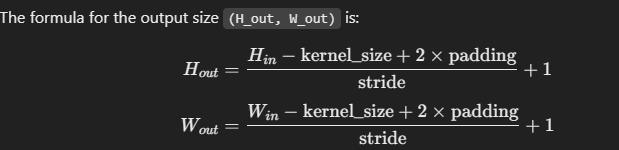

In [ ]:
class ObjectDetectionModel(nn.Module):
    def __init__(self):
        super(ObjectDetectionModel, self).__init__()
        
        # Shared CNN layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1), # 3 channels, 16 filters, 1 pixel shift, 1 pixel padding
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 128) # flatten Dense layer 64*8*8 input neurons nodes and 128 outputs nodes
        self.relu = nn.ReLU()

        # Classification head (binary)
        self.classification_head = nn.Linear(128, 1) # The Dense layer outputs a single value
        
        # Bounding box head (x_min, y_min, x_max, y_max)
        self.bbox_head = nn.Linear(128, 4)

    def forward(self, x):
        x = self.conv_layers(x) #  torch.Size([32, 3, 28, 28])
        x = x.view(x.shape[0], -1)  # Flatten torch.Size([32, 2352])

        x = self.relu(self.fc1(x))

        class_out = torch.sigmoid(self.classification_head(x))  # Binary classification
        bbox_out = self.bbox_head(x)  # Bounding box regression

        return class_out, bbox_out

# Instantiate model
model = ObjectDetectionModel()


In [7]:
# Define loss functions
class_loss_fn = nn.BCELoss() # Binary Cross-Entropy Loss
bbox_loss_fn = nn.MSELoss() # Mean Squared Error (MSE) Loss 

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    epoch_class_loss = 0.0
    epoch_bbox_loss = 0.0
    
    for images, labels, bboxes in dataloader:
        optimizer.zero_grad()

        # Forward pass
        class_preds, bbox_preds = model(images) # train image with bounding boxes

        # Compute loss
        class_loss = class_loss_fn(class_preds.squeeze(), labels.float()) # loss for class labels
        bbox_loss = bbox_loss_fn(bbox_preds, bboxes) # loss for bboxes

        total_loss = class_loss + bbox_loss

        # Backward pass
        total_loss.backward()
        optimizer.step()

        epoch_class_loss += class_loss.item()
        epoch_bbox_loss += bbox_loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Class Loss: {epoch_class_loss:.4f}, BBox Loss: {epoch_bbox_loss:.4f}")

print("Training complete!")


Epoch [1/10], Class Loss: 0.7097, BBox Loss: 0.2231
Epoch [2/10], Class Loss: 0.6149, BBox Loss: 0.1104
Epoch [3/10], Class Loss: 0.4780, BBox Loss: 0.0529
Epoch [4/10], Class Loss: 0.3210, BBox Loss: 0.0587
Epoch [5/10], Class Loss: 0.1244, BBox Loss: 0.2314
Epoch [6/10], Class Loss: 0.1206, BBox Loss: 0.0616
Epoch [7/10], Class Loss: 0.0746, BBox Loss: 0.0262
Epoch [8/10], Class Loss: 0.0469, BBox Loss: 0.0323
Epoch [9/10], Class Loss: 0.0363, BBox Loss: 0.0597
Epoch [10/10], Class Loss: 0.0258, BBox Loss: 0.0465
Training complete!


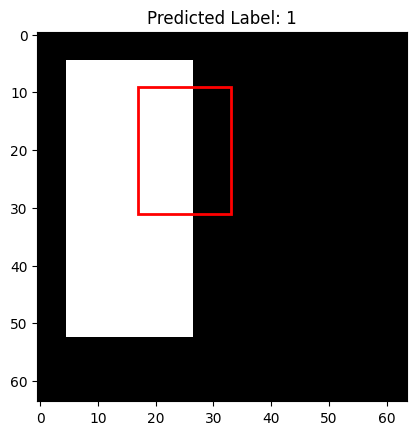

In [ ]:
# Load a sample image
sample_image, sample_label, sample_bbox = dataset[0]
sample_image = sample_image.unsqueeze(0)  # Add batch dimension

# Make prediction
with torch.no_grad():
    pred_label, pred_bbox = model(sample_image)

# Convert predictions to original scale
H, W = dataset.img_size, dataset.img_size
pred_bbox = pred_bbox.squeeze().numpy()
pred_bbox = [int(pred_bbox[i] * H) for i in range(4)] # his contains normalized bounding box coordinates (values between 0 and 1).
# H: The height (or width, assuming square images) of the original image.

# Display result
img = sample_image.squeeze().permute(1, 2, 0).numpy() # f sample_image has shape (1, C, H, W) (i.e., a batch of size 1),
# .squeeze() removes the batch dimension, making it (C, H, W).PyTorch uses (C, H, W) format, whereas NumPy and Matplotlib expect (H, W, C).
# (C, H, W) → (H, W, C)

plt.imshow(img)
# # Draw bounding box
plt.gca().add_patch(plt.Rectangle((pred_bbox[0], pred_bbox[1]),  # # Top-left corner (x_min, y_min)
                                pred_bbox[2] - pred_bbox[0],  # Width (x_max - x_min)
                                pred_bbox[3] - pred_bbox[1],  # Height (y_max - y_min)

                                edgecolor='red', linewidth=2, fill=False))
plt.title(f"Predicted Label: {int(pred_label.item() > 0.5)}")
plt.show()


Images: train2017 and val2017 datasets

Annotations: instances_train2017.json and instances_val2017.json

COCO (Common Objects in Context) is a widely used dataset for object detection, segmentation, and keypoint detection tasks. Preparing COCO for object detection involves downloading the dataset, preprocessing images and annotations, and creating a DataLoader for training a deep learning model.

In [ ]:
# pip install pycocotools

In [ ]:
# coco_dataset/
# │── train2017/             # contain all class images and labels are defined in annotations json format
# │── val2017/
# │── annotations/
# │   ├── instances_train2017.json
# │   ├── instances_val2017.json


The annotation files (.json) contain bounding boxes and category labels. We can parse them using pycocotools.

In [ ]:
from pycocotools.coco import COCO

# Define paths
train_json = "coco_dataset/annotations/instances_train2017.json"
val_json = "coco_dataset/annotations/instances_val2017.json"

# Load COCO annotations
coco_train = COCO(train_json)
coco_val = COCO(val_json)

# Get class labels
categories = coco_train.loadCats(coco_train.getCatIds())
category_names = {cat['id']: cat['name'] for cat in categories}
print(category_names)


annotation json sample format

In [ ]:
# {

#   "annotations": [
#     {
#       "id": 1,
#       "image_id": 1,
#       "category_id": 1,
#       "bbox": [50, 30, 100, 150],  // (x_min, y_min, width, height)
#       "area": 15000,
#       "segmentation": [[50,30, 150,30, 150,180, 50,180]],  // Optional for instance segmentation
#       "iscrowd": 0
#     },
#     {
#       "id": 2,
#       "image_id": 1,
#       "category_id": 2,
#       "bbox": [200, 100, 80, 120],
#       "area": 9600,
#       "segmentation": [[200,100, 280,100, 280,220, 200,220]],
#       "iscrowd": 0
#     }
#   ],
#   "categories": [
#     {
#       "id": 1,
#       "name": "car",
#       "supercategory": "vehicle"
#     },
#     {
#       "id": 2,
#       "name": "person",
#       "supercategory": "human"
#     }
#   ]
# }


In [ ]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import cv2
import os
import numpy as np

class COCODataset(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.coco = COCO(annotation_file)
        self.img_ids = list(self.coco.imgs.keys())
        self.transform = transform

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]

        # Load image
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = os.path.join(self.root_dir, img_info['file_name'])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load annotations (bounding boxes & labels)
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        annotations = self.coco.loadAnns(ann_ids)

        boxes = []
        labels = []
        for ann in annotations:
            x, y, w, h = ann['bbox']
            boxes.append([x, y, x + w, y + h])
            labels.append(ann['category_id'])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}

        if self.transform:
            image = self.transform(image)

        return image, target

# Define dataset with transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((512, 512))
])

train_dataset = COCODataset("coco_dataset/train2017", "coco_dataset/annotations/instances_train2017.json", transform=transform)


In [ ]:
# from torch.utils.data import DataLoader
# # for classification
# # Assuming 'CustomDataset' returns (image, target) for each sample
# train_dataset = CustomDataset("path/to/dataset", transform=your_transform)
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))

# Fetch a batch
images, targets = next(iter(train_loader))

# Print shape of first image & bounding boxes
print(images[0].shape)
print(targets[0]['boxes'])


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_sample(image, target):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image.permute(1, 2, 0))

    for box in target['boxes']:
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

# Visualize the first sample
visualize_sample(images[0], targets[0])


Train an Object Detection Model

In [ ]:
import torchvision.models.detection as models

# Load pre-trained Faster R-CNN
model = models.fasterrcnn_resnet50_fpn(pretrained=True)

# Modify the model for COCO dataset
num_classes = 91  # COCO has 80 classes + 1 background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Train the model using train_loader...



In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10  # Number of training epochs


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from tqdm import tqdm


In [ ]:
def train_model(model, train_loader, optimizer, num_epochs=10):
    model.train()  # Set model to training mode

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

        for images, targets in progress_bar:
            images = [img.to(device) for img in images]  # Move images to GPU
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()  # Reset gradients
            loss_dict = model(images, targets)  # Forward pass
            loss = sum(loss for loss in loss_dict.values())  # Sum up all losses
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            epoch_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())

        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

    print("Training complete!")

# Run training
train_model(model, train_loader, optimizer, num_epochs=10)


Convert COCO Annotations to PyTorch Format

Model

Classification Head: A single neuron with a sigmoid activation (for binary classification).

Bounding Box Head: Four neurons for (x_min, y_min, x_max, y_max) prediction.

Facenet Model

In [ ]:
# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os


def detect_and_predict_mask(frame, faceNet, maskNet):

	# grab the dimensions of the frame and 
	# then construct a blob from it
	(h, w) = frame.shape[:2] #  height (h) and width (w) of the frame image.
	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224), # DNN stands for Deep Neural Network
								(104.0, 177.0, 123.0))
    # This line creates a blob (a binary large object) from the frame image, which is a format that can be fed into a DNN.
    # frame: The input image frame.
	# 1.0: The scale factor for the image.
	# (224, 224): The desired size of the output blob.
	# (104.0, 177.0, 123.0): The mean values for each color channel (BGR) to be subtracted from the image.
	# pass the blob through the network 
	# and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)
#  This line sets the input blob for the FaceNet model. The blob is a pre-processed image that has been 
# resized and normalized.
# This line runs the FaceNet model on the input blob and stores the output in the detections variable.

	# initialize our list of faces, their
	# corresponding locations, and the list
	# of predictions from our face mask network
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]): # where detections.shape[2] represents the number of detections.
	
		# extract the confidence (i.e.,
		# probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2] # This line extracts the confidence score (i.e., probability) associated with the current detection.
		#(batch_size, 1, num_detections, 7)
# 		0: The batch size index (usually 0 for single-image inputs).
# 0: The detection index (usually 0 for single-detection outputs).
# i: The detection iteration index (loops over the number of detections).
# 2: The confidence score index (usually 2 for FaceNet outputs).
		# filter out weak detections by 
		# ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
		
			# compute the (x, y)-coordinates
			# of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h]) # This line extracts the bounding box coordinates (x, y, w, h) from the detections array.
			(startX, startY, endX, endY) = box.astype("int") # This line scales the bounding box coordinates to the original image size by multiplying them with the image width and height.
            # This line converts the bounding box coordinates to integers and unpacks them into separate variables (startX, startY, endX, endY).
			# ensure the bounding boxes fall 
			# within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it
			# from BGR to RGB channel
			# ordering, resize it to 224x224, 
			# and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

			# add the face and bounding boxes 
			# to their respective lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# only make a predictions if at least one
	# face was detected
	if len(faces) > 0:
	
		# for faster inference we'll make 
		# batch predictions on *all*
		# faces at the same time rather 
		# than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations
	# and their corresponding locations
	return (locs, preds)


# load our serialized face detector model from disk
prototxtPath = r"face_detector\deploy.prototxt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
maskNet = load_model("mask_detector.model")

# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded 
	# video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)

	# detect faces in the frame and 
	# determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

	# loop over the detected face 
	# locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
	
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

		# determine the class label and 
		# color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		# display the label and bounding box 
		# rectangle on the output frame
		cv2.putText(frame, label, (startX, startY - 10),
					cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()


Formatting data

Since our model has a fixed 244 x 244 input layer, we need to format any input image before feed it to the model (to train or to predict). 

In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_size = 244

def format_image(img, box):
    height, width = img.shape 
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv.resize(img, new_size, interpolation= cv.INTER_LINEAR)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized

    x, y, w, h = box[0], box[1], box[2], box[3]
    new_box = [int((x - 0.5*w)* width / r), int((y - 0.5*h) * height / r), int(w*width / r), int(h*height / r)]

    return new_image, new_box

In [ ]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4, BATCH_SIZE//4, i + 1)
        label = labels[0][i]
        box = (labels[1][i] * input_size)
        box = tf.cast(box, tf.int32)

        image = images[i].numpy().astype("float") * 255.0
        image = image.astype(np.uint8)
        image_color = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

        color = (0, 0, 255)
        if label[0] > 0:
            color = (0, 255, 0)

        cv.rectangle(image_color, box.numpy(), color, 2)

        plt.imshow(image_color)
        plt.axis("off")

The model

An Object Detection is a combination of two tasks:

regression of the bound-box coordinates
classification of the object label
This means that our model has two outputs: namely the object label and the object bound box. Therefore, the model must combine the tasks of classification and regression.

The Classifier

Let’s forget the bound box for a while and begin with a simpler classifier:

In [ ]:

CLASSES = 2
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.AveragePooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    
    tf.keras.layers.Dense(CLASSES, activation='softmax')
    
])

In [ ]:

CLASSES = 2

def build_classifier(inputs):

    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 1))(inputs)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    
    x = tf.keras.layers.Dense(CLASSES, activation='softmax')(x)

    return x

In [ ]:
def build_regressor(inputs):

    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 1))(inputs)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    
    x = tf.keras.layers.Dense(units = '4')(inputs)(x)

    return x

In [ ]:
def build_feature_extractor(inputs):

    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 1))(inputs)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    return x

def build_model_adaptor(inputs):
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    return x

def build_classifier_head(inputs):
    return tf.keras.layers.Dense(CLASSES, activation='softmax', name = 'classifier_head')(inputs)

def build_regressor_head(inputs):
    return tf.keras.layers.Dense(units = '4', name = 'regressor_head')(inputs)

def build_model(inputs):
    
    feature_extractor = build_feature_extractor(inputs)

    model_adaptor = build_model_adaptor(feature_extractor)

    classification_head = build_classifier_head(model_adaptor)

    regressor_head = build_regressor_head(model_adaptor)

    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])

    return model
